#  test the model on unseen images using a saved model, you can follow these steps:

    Load the saved model.

    Preprocess the unseen image(s).

    Pass the preprocessed image(s) through the model.

    Interpret the model output.

In [1]:
import torch
from torchvision.transforms import transforms
from PIL import Image
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import ImageFolder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Define the neural network architecture (make sure it matches the architecture of the saved model)
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(3 * 256 * 256, 128)  # Assuming input images are RGB and 256x256
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 2)  # Output layer with 2 classes
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 3 * 256 * 256)  # Flatten the input images
        x = self.relu(self.fc1(x))
        x = self.softmax(self.fc2(x))
        return x



In [2]:
# Instantiate the model
model = SimpleNN()

# Load the saved model state
model.load_state_dict(torch.load('binary_classification_model.pth'))
model.eval()



SimpleNN(
  (fc1): Linear(in_features=196608, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=2, bias=True)
  (softmax): Softmax(dim=1)
)

In [3]:
# Define the image preprocessing transformation
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])



In [4]:
# Load and preprocess the unseen image
image_path = 'test.jpg'  # Replace with the path to your unseen image
image = Image.open(image_path)

input_tensor = transform(image).unsqueeze(0)  # Add an extra dimension for batch size
print(input_tensor.shape)

torch.Size([1, 3, 256, 256])


In [5]:
# Make predictions
with torch.no_grad():
    model_output = model(input_tensor)


# Interpret the model output
_, predicted_class = torch.max(model_output, 1)
print(predicted_class)

tensor([1])


In [6]:
class_labels = ['daisy','dandelion']  # Replace with your actual class labels
predicted_class_label = class_labels[predicted_class.item()]

print(f'The model predicts that the image belongs to class: {predicted_class_label}')


The model predicts that the image belongs to class: dandelion


# Display the image along with the predicted class

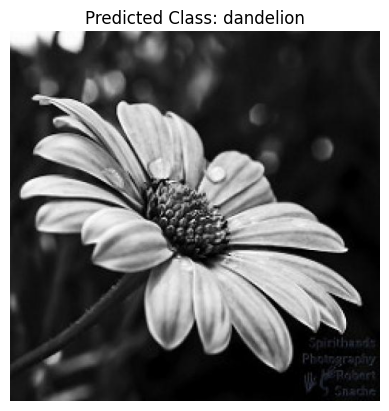

In [7]:
import numpy as np
# Display the image along with the predicted class
image_array = np.array(image)
plt.imshow(image_array)
plt.title(f'Predicted Class: {predicted_class_label}')
plt.axis('off')
plt.show()